In [4]:
import os

import flwr as fl
import tensorflow as tf

# Make TensorFlow log less verbose
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"


if __name__ == "__main__":
    # Load and compile Keras model
    model = tf.keras.applications.MobileNetV2((32, 32, 3), classes=10, weights=None) #mobilnet_v2이용
    model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])

    # Load CIFAR-10 dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

    # Define Flower client
    class CifarClient(fl.client.NumPyClient):
        def get_parameters(self):  # type: ignore 
            return model.get_weights() #파라미터 수집부

        def fit(self, parameters, config):  # type: ignore
            model.set_weights(parameters)
            model.fit(x_train, y_train, epochs=1, batch_size=32, steps_per_epoch=3)
            return model.get_weights(), len(x_train), {}

        def evaluate(self, parameters, config):  # type: ignore
            model.set_weights(parameters)
            loss, accuracy = model.evaluate(x_test, y_test)
            return loss, len(x_test), {"accuracy": accuracy}

    # Start Flower client
    fl.client.start_numpy_client("127.0.0.1:8080", client=CifarClient())


DEBUG flower 2021-10-21 15:16:34,268 | connection.py:36 | ChannelConnectivity.IDLE
INFO flower 2021-10-21 15:16:34,270 | app.py:61 | Opened (insecure) gRPC connection
DEBUG flower 2021-10-21 15:16:34,270 | connection.py:36 | ChannelConnectivity.READY


313/313 [==============================] - 4s 14ms/step - loss: 2.3026 - accuracy: 0.1000


DEBUG flower 2021-10-21 15:16:46,947 | connection.py:68 | Insecure gRPC channel closed
INFO flower 2021-10-21 15:16:46,947 | app.py:72 | Disconnect and shut down


os.environ["TF_CPP_MIN_LOG_LEVEL"]

#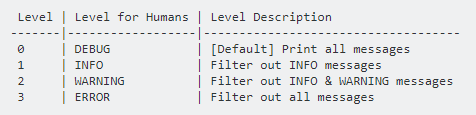